In [102]:
import sys
!{sys.executable} -m pip install wordcloud

In [103]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk
nltk.download('all')
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from wordcloud import WordCloud
url = 'https://raw.githubusercontent.com/breanna-s/Mental-Health-Chatbot/refs/heads/main/Combined%20Data.csv'
df = pd.read_csv(url)
df.head()

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\conno\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\conno\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\conno\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     C:\Users\conno\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\conno\AppData\Roaming\nltk_data...
[

,Unnamed: 0,statement,status
0,0,oh my gosh,Anxiety
1,1,"trouble sleeping, confused mind, restless hear...",Anxiety
2,2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety
3,3,I've shifted my focus to something else but I'...,Anxiety
4,4,"I'm restless and restless, it's been a month n...",Anxiety


In [104]:
df.isnull().sum()


Unnamed: 0      0
statement     362
status          0
dtype: int64

In [105]:
df.dropna(how='any', axis=0, inplace=True)
df.isnull().sum()

Unnamed: 0    0
statement     0
status        0
dtype: int64

In [106]:
# Counts for each Mental Health status
df["status"].value_counts()

status
Normal                  16343
Depression              15404
Suicidal                10652
Anxiety                  3841
Bipolar                  2777
Stress                   2587
Personality disorder     1077
Name: count, dtype: int64

In [107]:
# get number of characters as this will be ussed to eliminate outliers later
df['num_chars'] = df['statement'].str.len()
print(df['num_chars'].describe())

count    52681.000000
mean       578.713863
std        846.269078
min          2.000000
25%         80.000000
50%        317.000000
75%        752.000000
max      32759.000000
Name: num_chars, dtype: float64


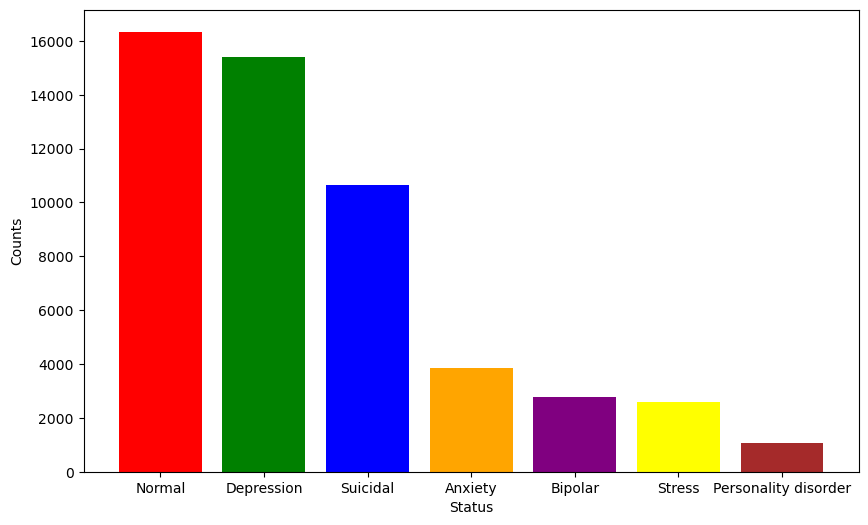

In [108]:
# Visualization of distribution of each Mental Health Status
s_count = df["status"].value_counts()
colors = ['red', 'green', 'blue', 'orange', 'purple', 'yellow', 'brown'] 

plt.figure(figsize=(10,6))
plt.bar(s_count.index, s_count.values, color=colors[:len(s_count)])
plt.xlabel("Status")
plt.ylabel("Counts")
plt.show()

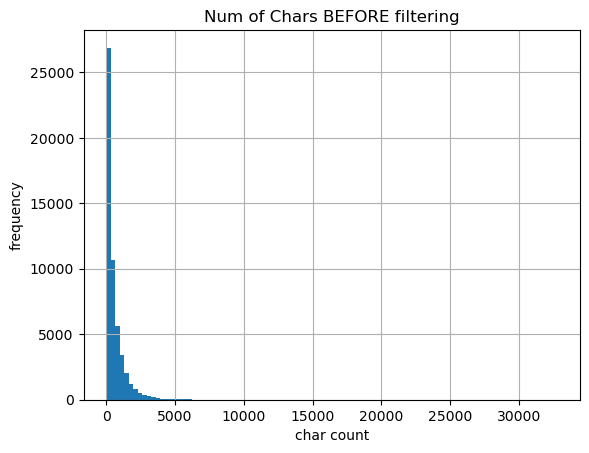

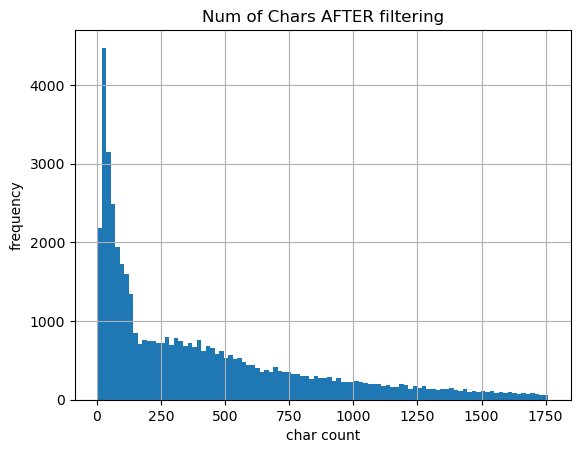

In [122]:
#remove outliers of the lower quarter percentile and upper quarter percentile of the number of characters

df['num_chars'].hist(bins=100)
plt.title('Num of Chars BEFORE filtering')
plt.xlabel('char count')
plt.ylabel('frequency')
plt.show()



lower_q = df['num_chars'].quantile(.25)
upper_q = df['num_chars'].quantile(.75)
q_range = upper_q - lower_q

lower_bound = lower_q - 1.5 * q_range
upper_bound = upper_q + 1.5 * q_range

filtered_df = df[(df['num_chars'] >= lower_bound) & (df['num_chars'] <= upper_bound) ]
filtered_df['num_chars'].hist(bins=100)
plt.title('Num of Chars AFTER filtering')
plt.xlabel('char count')
plt.ylabel('frequency')
plt.show()


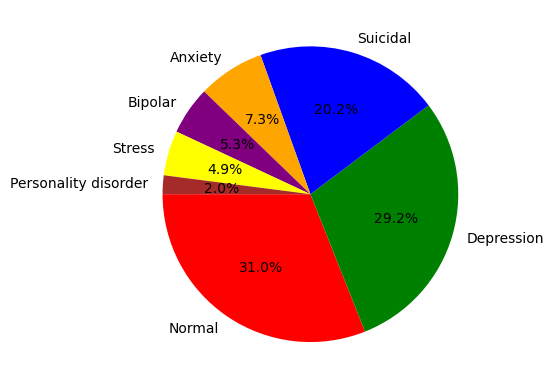

In [110]:
#data is skewed so will need to fix that at some point, shown as pie chart
colors =  ['red', 'green', 'blue', 'orange', 'purple', 'yellow', 'brown'] 
plt.pie(s_count, labels=s_count.index, autopct='%.1f%%', colors=colors, startangle=180)
random_statements = df.groupby("status")["statement"].apply(lambda x: x.sample(n=1)) #this prevents a random print for some reason

   
#status: ('Suicidal', 36299) isnt suicidal, sh
#statement: @realDonaldTrump It already is! At least in France one doesn't die/loss everything when get sick &amp; have at least 1â¦ https://t.co/QYN3ku1Q8T

In [111]:
#get random values for each of the status types as examples
random_statements = df.groupby("status")["statement"].apply(lambda x: x.sample(n=1))
for status, statement in random_statements.items():
    print(f"status: {status}")
    print(f"statement: {statement}", end="\n\n-----------------------------------------------\n")

status: ('Anxiety', 35080)
statement: Any of you w/ anxiety/panic ever notice bulging veins in arms, hands, legs It's always at night when I notice it, but I will look down and it looks like I just gotdone working out or I am on roids. Scares me that it is BP or my heart. Usually all of my tests come out fine but I haven't been to the doctor in a couple months. 
I have anxiety symptoms daily so it may be from all of that stress, Idk.

-----------------------------------------------
status: ('Bipolar', 46238)
statement: How do you guys make it through relentless suicidal thoughts? Nothing is going right in my life. I don't really have a reason to keep going, I don't have a support system or anyone that cares about me. I can't stop thinking about killing myself. I'm 75% sure I won't see 2020. 

I'm just trying to make it through each day and I'm getting to where I can't handle the never-ending thoughts of killing myself. I usually just try to distract myself with youtube or twitch, playi

In [112]:
import re
#convert the statements all to lower case to keep tokenization consistent
df['statement'] = df['statement'].str.lower()
#remove puncuation, markdown, urls, special chars
def remove_special_inputs(text):
    text = re.sub(r"http[s]?://\S+","",text)
    # Remove markdown-style links
    text = re.sub(r'\[.*?\]\(.*?\)', "", text)
    # Remove handles (that start with '@')
    text = re.sub(r"@\w+","",text)
    # Remove punctuation and other special characters
    text = re.sub(r"[^\w\s]","",text)
    return text
df['statement'] = df['statement'].apply(remove_special_inputs)
df.head()


,Unnamed: 0,statement,status,num_chars
0,0,oh my gosh,Anxiety,10
1,1,trouble sleeping confused mind restless heart ...,Anxiety,64
2,2,all wrong back off dear forward doubt stay in ...,Anxiety,78
3,3,ive shifted my focus to something else but im ...,Anxiety,61
4,4,im restless and restless its been a month now ...,Anxiety,72


In [113]:
#need to tokenize each the elements in the statement column of the data
#use the word_tokenize from nltk to divide the string into individual words
df['tokens'] = df['statement'].apply(word_tokenize)
df.sample(5)



,Unnamed: 0,statement,status,num_chars,tokens
37212,37212,i almost attempted suicide again when someone ...,Suicidal,170,"[i, almost, attempted, suicide, again, when, s..."
30951,30951,they bark at everything,Normal,24,"[they, bark, at, everything]"
46301,46301,is it possible or does it make sense to be sel...,Bipolar,969,"[is, it, possible, or, does, it, make, sense, ..."
29756,29756,______________________________________________...,Normal,475,[_____________________________________________...
31007,31007,it has wonderful restaurants,Normal,29,"[it, has, wonderful, restaurants]"


In [114]:
#need to stem the the tokens to eliminate prefix and suffixes to get the root word
#this will standardize the words used in the training data for the model 
stemmer = PorterStemmer() #initialize stemmer

def token_stemming(tokens):
  return ' '.join(stemmer.stem(str(token)) for token in tokens)

df['tokens_stem'] = df['tokens'].apply(token_stemming)

df.sample(5)

,Unnamed: 0,statement,status,num_chars,tokens,tokens_stem
14086,14086,its my fault i was used its my fault i was not...,Depression,468,"[its, my, fault, i, was, used, its, my, fault,...",it my fault i wa use it my fault i wa not sexu...
44564,44564,i can t breatheee i hate being sick,Normal,35,"[i, can, t, breatheee, i, hate, being, sick]",i can t breathee i hate be sick
819,819,god no longer gives you a test youre the only ...,Normal,75,"[god, no, longer, gives, you, a, test, youre, ...",god no longer give you a test your the onli on...
25275,25275,for 15 years i have battled with ptsd and majo...,Depression,2208,"[for, 15, years, i, have, battled, with, ptsd,...",for 15 year i have battl with ptsd and major d...
52440,52440,job anxiety hi everyone\nim writing here becau...,Anxiety,651,"[job, anxiety, hi, everyone, im, writing, here...",job anxieti hi everyon im write here becaus i ...


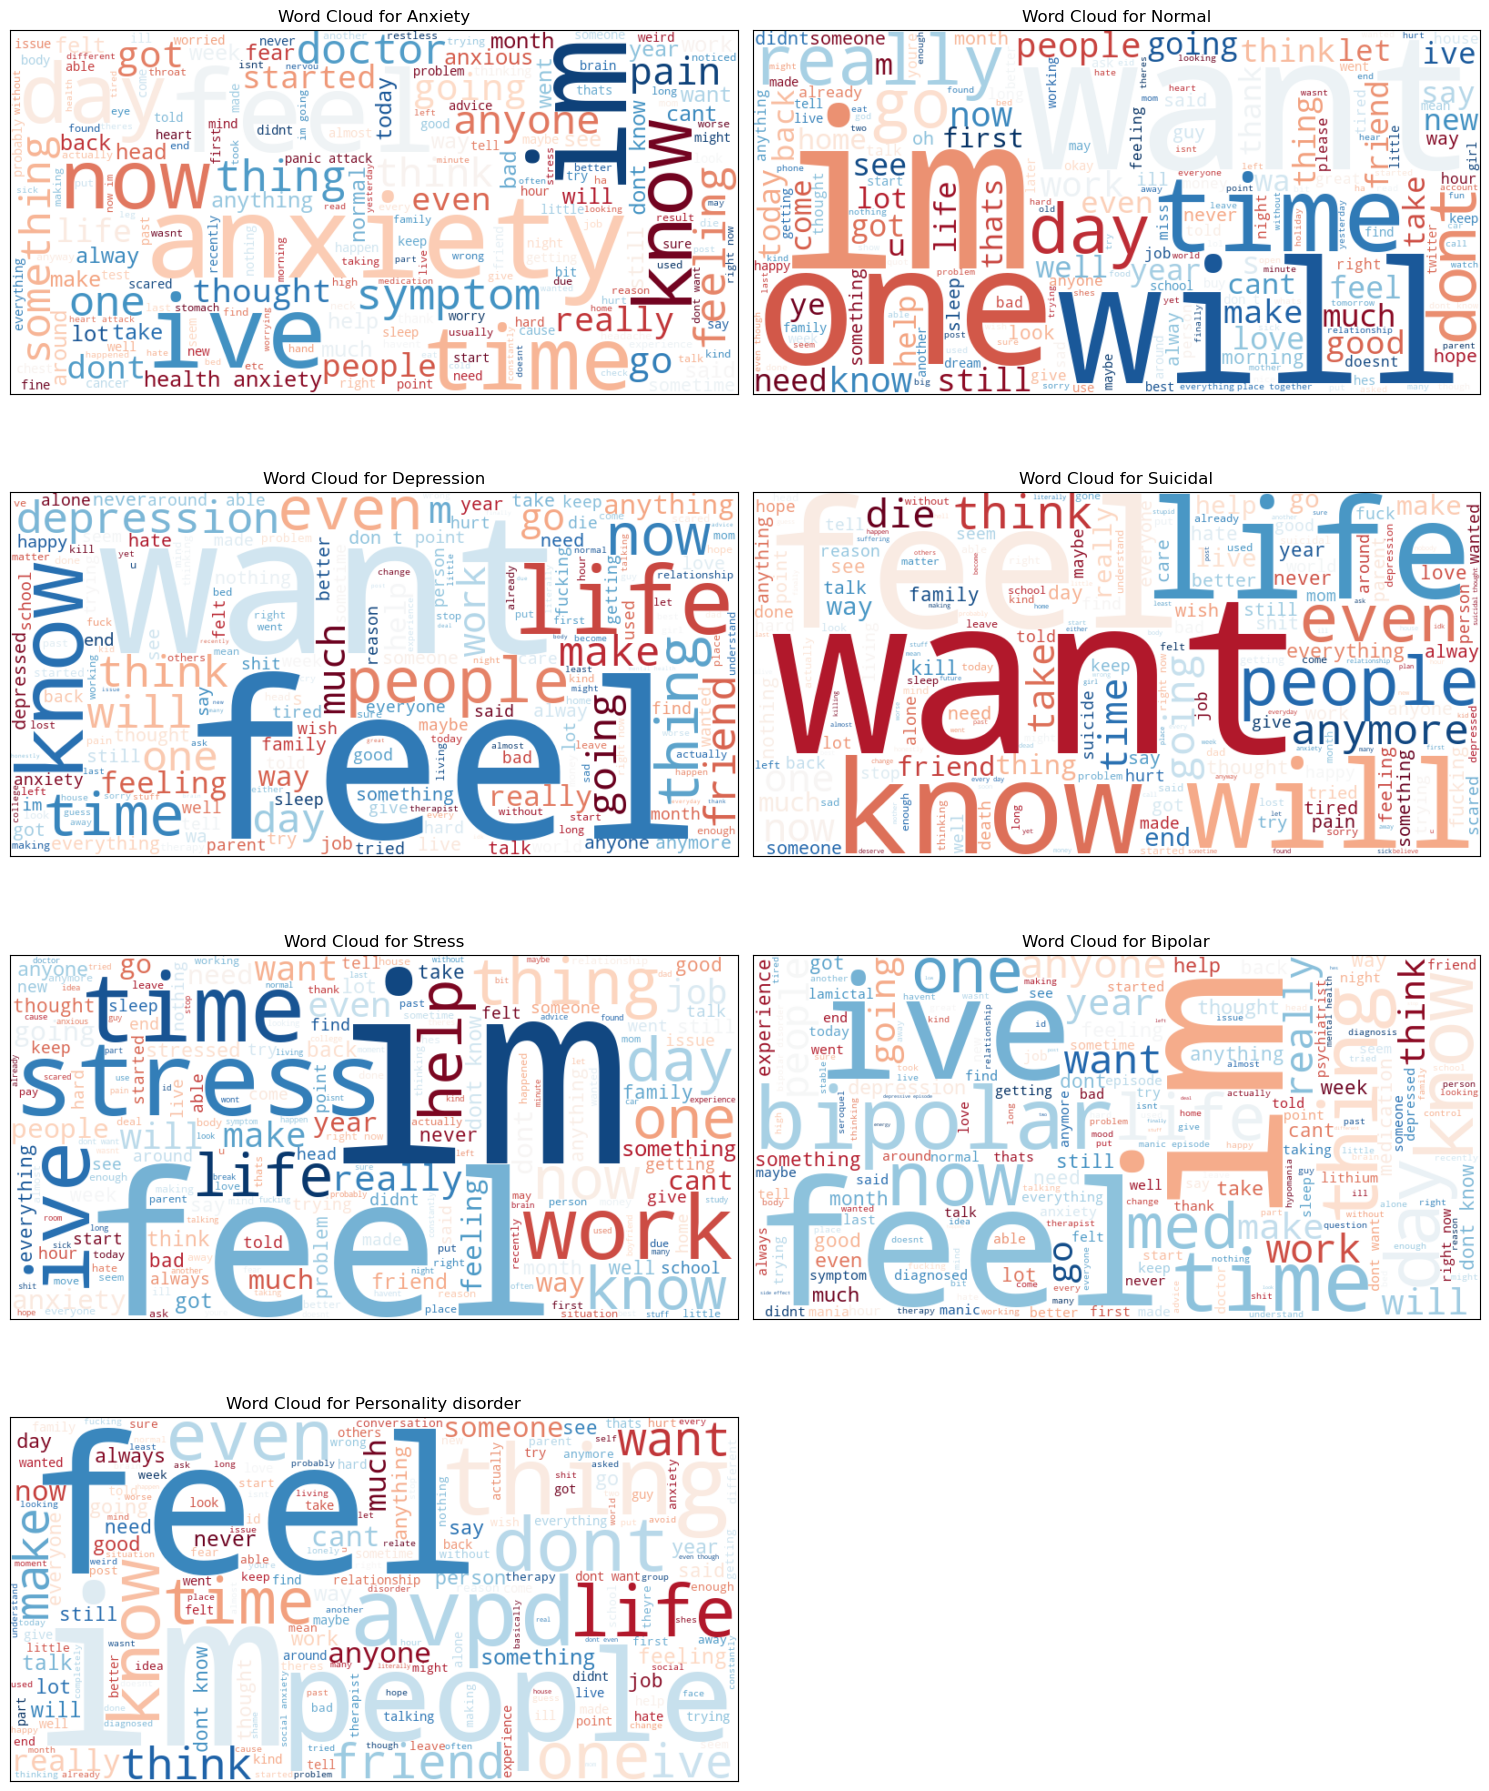

In [115]:
#word collages can help show the common words for each condition
#colormap =  RdBu

unique_status = df['status'].unique()
plt.figure(figsize=(15, 45))

for i, status in enumerate(unique_status):
  tokens_data = ' '.join(df[df['status'] == status]['tokens'].dropna().apply(lambda x: ' '.join(x)).tolist())
  word_cloud = WordCloud(width=800, height=400, background_color='white', colormap='RdBu').generate(tokens_data)
  axes = plt.subplot(len(unique_status) // 2 + 1, 2, i+1)
  plt.imshow(word_cloud, interpolation='bilinear')
  plt.title(f'Word Cloud for {status}')
  plt.xticks([])
  plt.yticks([])

plt.tight_layout()
plt.subplots_adjust(hspace=-.85)
plt.show()
